In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
data=pd.read_csv(r'C:\Users\Acer\Desktop\online retail clustering\data\routine_rhythms_2024_final_clean.csv')
data.head(3)

,user_id,date,weekday,is_weekend,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs,archetype_ground_truth,is_anomaly_ground_truth
0,0,2024-01-01,Monday,0,9.283352,4011,56,6.697363,0.342522,1.329944,Workaholic,0
1,0,2024-01-02,Tuesday,0,8.685627,3243,47,4.907359,2.492128,1.286140,Workaholic,0
2,0,2024-01-03,Wednesday,0,8.877688,4074,85,5.947526,1.797807,0.919941,Workaholic,0


In [39]:
features_for_clustering = [
    'screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs'
]
X = data[features_for_clustering]

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X_scaled)

In [42]:
X_scaled=X_scaled[outlier_labels==1]
data=data[outlier_labels==1]

In [43]:
wcss_values=[]
k_range=range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

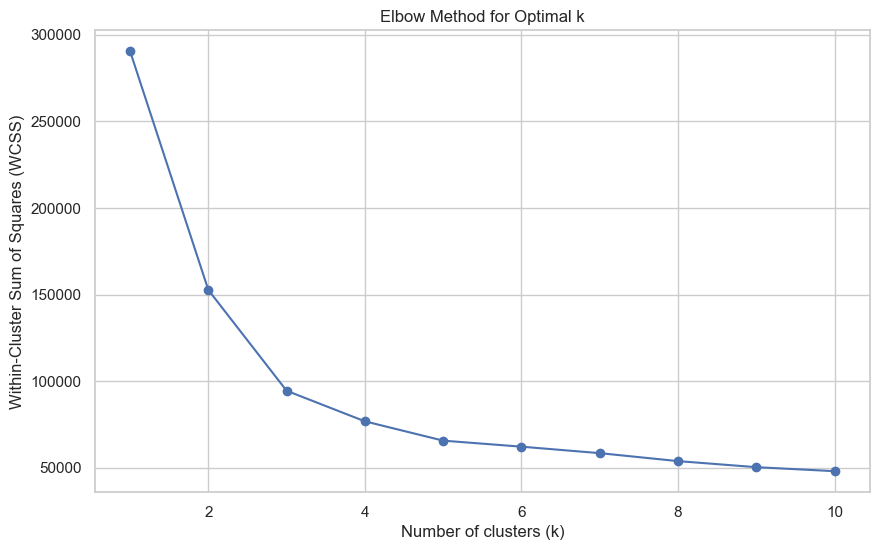

In [44]:
plt.figure(figsize=(10,6))
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

In [50]:
kmeans=KMeans(n_clusters=3, random_state=42)
data['cluster']=kmeans.fit_predict(X_scaled)
data['cluster'].value_counts()

cluster
2    27751
1    12296
0    12108
Name: count, dtype: int64

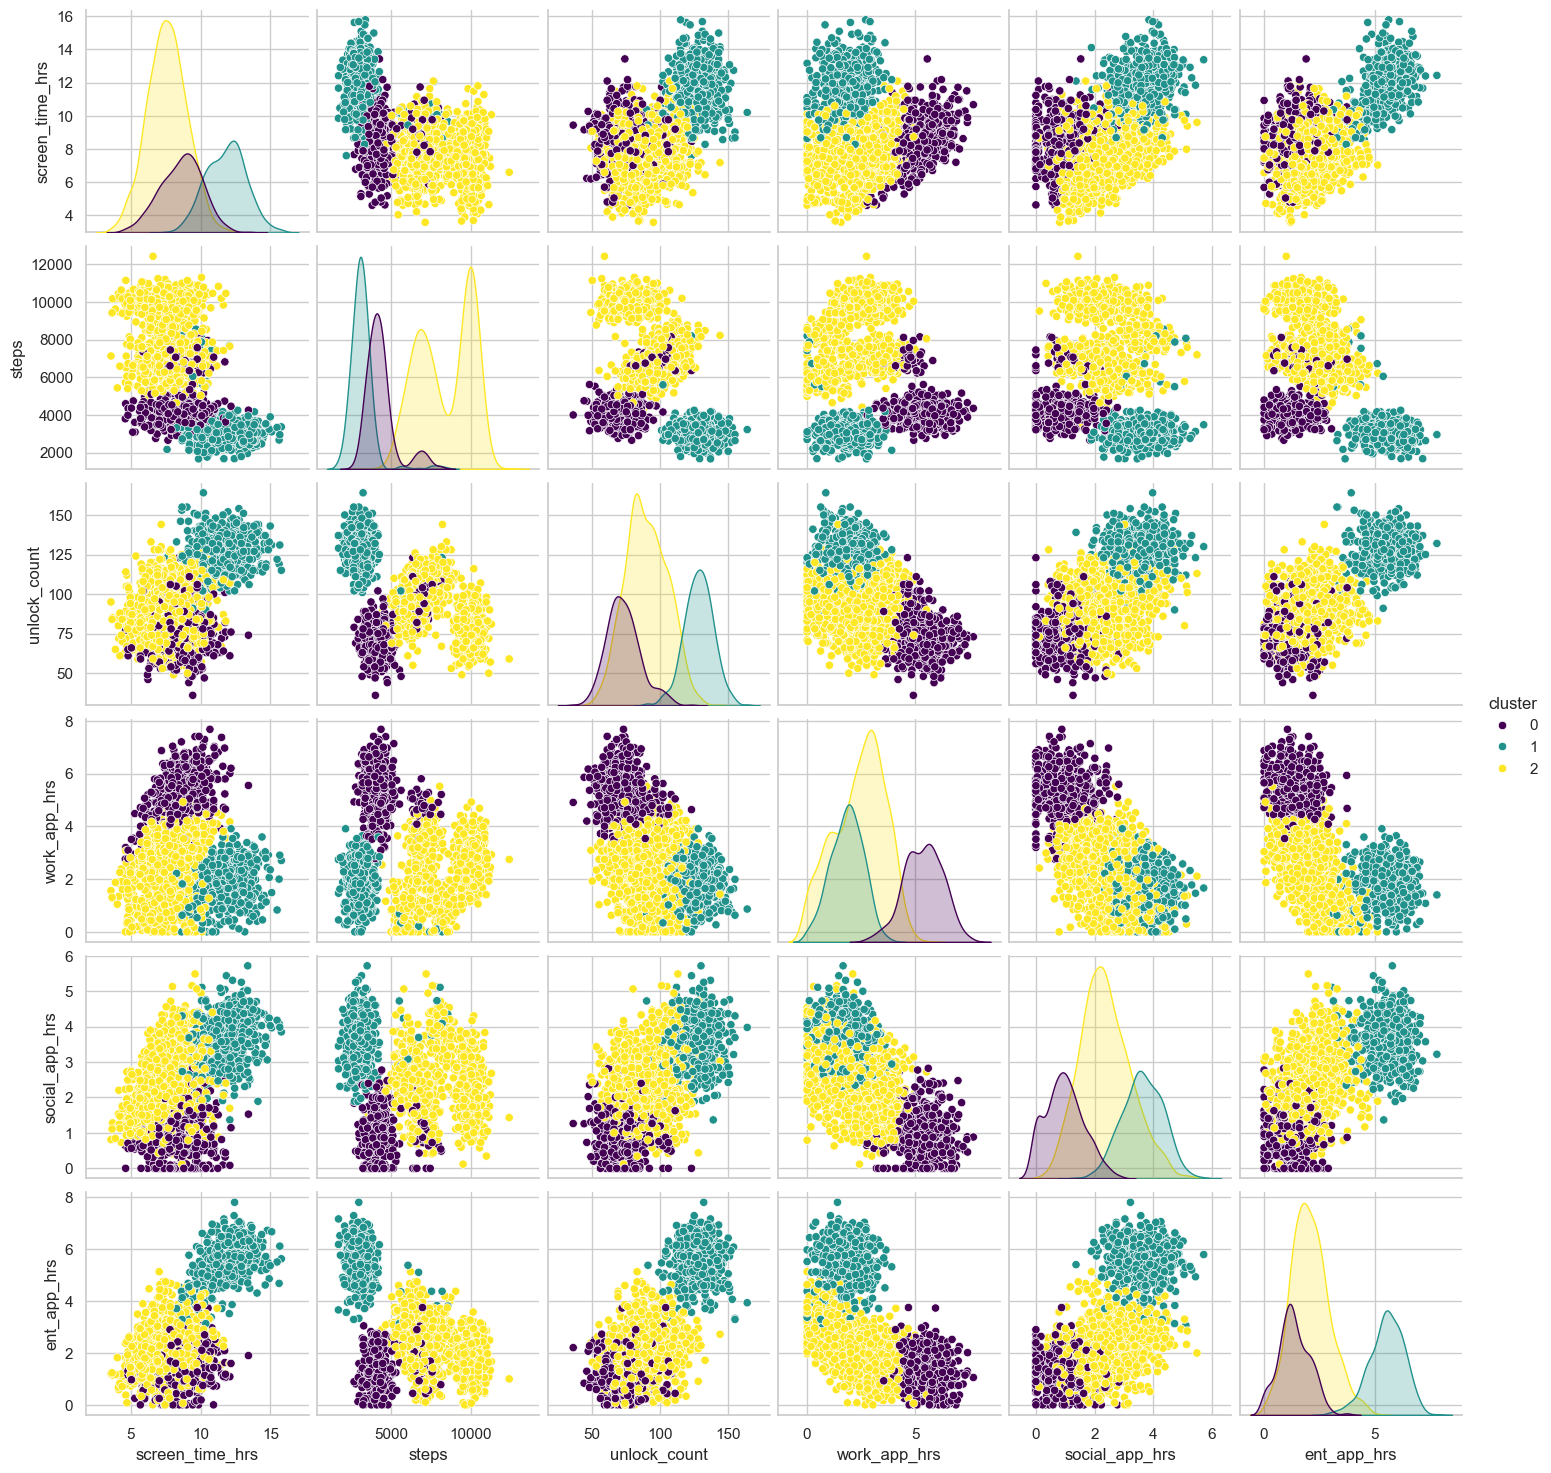

In [54]:
import seaborn as sns
sns.set(style="whitegrid")
sns.pairplot(data[['screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs',"cluster"]].sample(2000),hue='cluster', diag_kind='kde', palette='viridis')

In [51]:
#silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, data['cluster'])
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.433


In [52]:
centers=kmeans.cluster_centers_
labels=['screen_time_hrs', 
    'steps', 
    'unlock_count', 
    'work_app_hrs', 
    'social_app_hrs', 
    'ent_app_hrs']
centers

array([[-0.16571437, -0.6435603 , -0.9090974 ,  1.38422618, -1.10531781,
        -0.76225859],
       [ 1.22467839, -1.07417988,  1.34464304, -0.6507996 ,  1.04011524,
         1.48303272],
       [-0.54692089,  0.82687193, -0.22506846, -0.31515424, -0.01251771,
        -0.37775142]])

In [ ]:
#Radar chart of cluster centers
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig1=px.line_polar(r=centers[0], theta=labels, line_close=True)
fig2=px.line_polar(r=centers[1], theta=labels, line_close=True)
fig3=px.line_polar(r=centers[2], theta=labels, line_close=True)

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'} , {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}]],
                    subplot_titles=( 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.update_layout(height=800, width=1000, title_text="Cluster Centers Radar Chart")
fig.show()

In [55]:
centers=scaler.inverse_transform(centers)
centers=pd.DataFrame(centers, columns=features_for_clustering)
centers

,screen_time_hrs,steps,unlock_count,work_app_hrs,social_app_hrs,ent_app_hrs
0,8.518326,4280.598565,72.317916,5.343982,0.978320,1.392972
1,11.769979,3075.802863,128.909889,1.825709,3.670675,5.498538
2,7.626815,8394.602019,89.494050,2.405993,2.349701,2.096052


### Interpreting cluster centers.
- **Cluster 0**: Workaholics: Maximum screen time of work apps, less on social media and entertainment apps, Low number of steps suggesting desk work.
- **Cluster 1**: The Entertainment Junkie: Low steps, highest screen time, max time on entertainment apps and social media apps
- **Cluster 2**: Balanced Users: Least screen time, max steps, balanced time on all type of apps.